Breast cancer prediction using python


In [1]:
#importing libraries
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#importing dataset / reading data from file
df = pd.read_csv("Final_Dataset.csv")

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,7,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,8,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,9,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,10,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
#removing outliers
# --> calc mean for filling nil values 
# --> 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4552 non-null   int64  
 1   diagnosis                4552 non-null   object 
 2   radius_mean              4552 non-null   float64
 3   texture_mean             4552 non-null   float64
 4   perimeter_mean           4552 non-null   float64
 5   area_mean                4552 non-null   float64
 6   smoothness_mean          4552 non-null   float64
 7   compactness_mean         4552 non-null   float64
 8   concavity_mean           4552 non-null   float64
 9   concave points_mean      4552 non-null   float64
 10  symmetry_mean            4552 non-null   float64
 11  fractal_dimension_mean   4552 non-null   float64
 12  radius_se                4552 non-null   float64
 13  texture_se               4552 non-null   float64
 14  perimeter_se            

In [6]:
#return the size of dataset
df.shape

(4552, 32)

In [7]:
#dropping a col 
#removes the last column
#df= df.dropna(axis =1)

In [8]:
df.describe()
#describes the dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,...,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000
mean,2276.500000,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1314.193542,3.521338,4.297727,24.280286,351.643381,0.014053,0.052772,0.079658,0.038773,0.027393,...,4.829523,6.141529,33.576690,568.918953,0.022815,0.157215,0.208464,0.065682,0.061820,0.018047
min,1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,1138.750000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,2276.500000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,3414.250000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,4552.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
#function to calculate count of malignant and begnin cells
df['diagnosis'].value_counts()

B    2856
M    1696
Name: diagnosis, dtype: int64

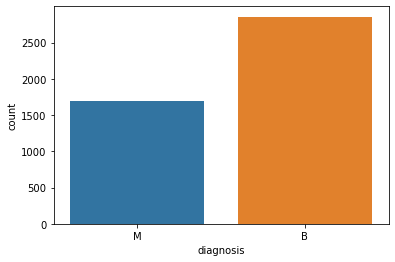

In [10]:
#
sns.countplot(df['diagnosis'],label= "count")

In [11]:
#using label encoder to convert string values to numeric values

from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] =labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,4,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,5,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df['diagnosis'].value_counts()

0    2856
1    1696
Name: diagnosis, dtype: int64

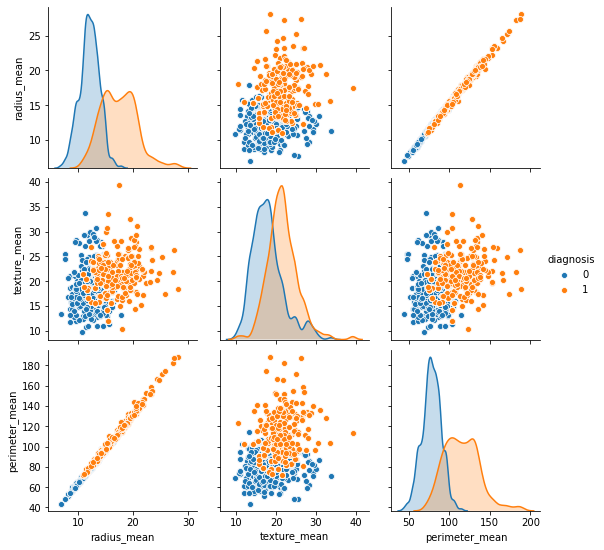

In [14]:
sns.pairplot(df.iloc[:,1:5],hue ="diagnosis")

In [15]:
#get the correlation
df.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


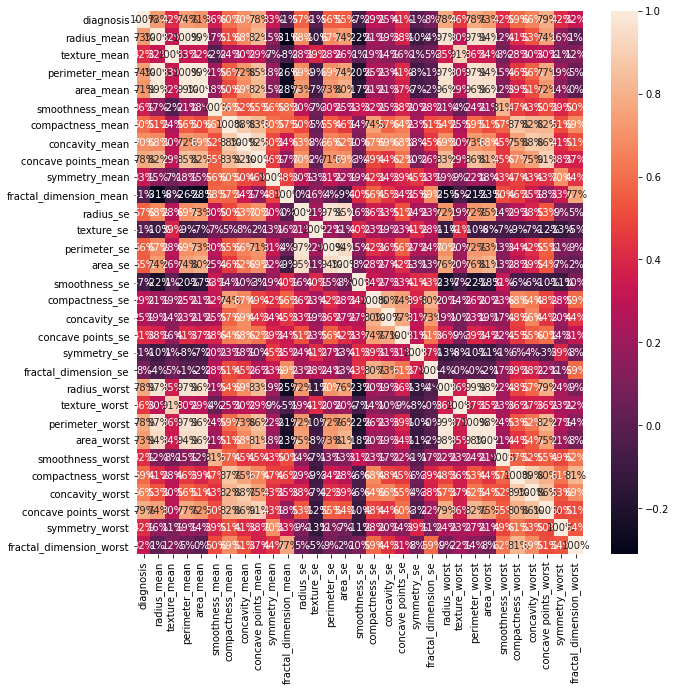

In [16]:
#visualize the correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:32].corr(),annot=True,fmt=".0%")

In [17]:
#spit the dataset into dependent(X) and independent(Y) variables 
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values
#now we nly have list and not dataset

In [18]:
print(Y)

[1 1 1 ... 1 1 0]


In [19]:
print(X)

[[ 17.99    10.38   122.8    ...   0.7119   0.2654   0.4601]
 [ 20.57    17.77   132.9    ...   0.2416   0.186    0.275 ]
 [ 19.69    21.25   130.     ...   0.4504   0.243    0.3613]
 ...
 [ 16.6     28.08   108.3    ...   0.3403   0.1418   0.2218]
 [ 20.6     29.33   140.1    ...   0.9387   0.265    0.4087]
 [  7.76    24.54    47.92   ...   0.       0.       0.2871]]


In [20]:
#splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [22]:
def models(X_train,Y_train):
    # logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state =0)
    log.fit(X_train,Y_train)
    
    
    # Decision tree
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion ="entropy")
    tree.fit(X_train,Y_train)
    
    
    # Random forest
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state = 0,criterion ="entropy",n_estimators =10)
    forest.fit(X_train,Y_train)
    
    print('[0]logistic regression accuracy',log.score(X_train,Y_train))
    print('[1]Decision Tree accuracy',tree.score(X_train,Y_train))
    print('[2]Random Forest accuracy',forest.score(X_train,Y_train))
    return log,tree,forest
    

In [23]:
model=models(X_train,Y_train)

[0]logistic regression accuracy 0.9920351551771491
[1]Decision Tree accuracy 1.0
[2]Random Forest accuracy 1.0


In [24]:
#testing the models

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for i in range(len(model)):
    print("Model",i)
    print(classification_report(Y_test,model[i].predict(X_test)))
    print("accuracy : ",accuracy_score(Y_test,model[i].predict(X_test)))

Model 0
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       559
           1       1.00      0.96      0.98       352

    accuracy                           0.98       911
   macro avg       0.99      0.98      0.98       911
weighted avg       0.98      0.98      0.98       911

accuracy :  0.9835345773874863
Model 1
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       559
           1       0.99      0.93      0.96       352

    accuracy                           0.97       911
   macro avg       0.97      0.96      0.97       911
weighted avg       0.97      0.97      0.97       911

accuracy :  0.969264544456641
Model 2
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       559
           1       1.00      0.97      0.98       352

    accuracy                           0.99       911
   macro avg       0.99      0.98      0.99

In [25]:
# Random forest model gives the maximum accuracy of 0.9879.

#prediction of random forest 
pred = model[2].predict(X_test)
print("Predicted values")
print(pred)
print("Actual values")
print(Y_test)

Predicted values
[1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1
 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0
 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0
 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1
 0 0 0 1

In [26]:
from joblib import dump
dump(model[2],"Brest_cancer_prediction_model.joblib")

['Brest_cancer_prediction_model.joblib']